In [60]:
import typing
import numpy as np
import pygmt
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt
from scipy import ndimage

In [9]:
R = np.random.rand

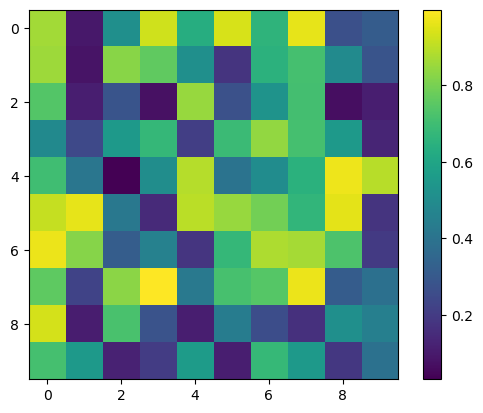

In [73]:
plt.imshow(grid, interpolation='none')
plt.colorbar()

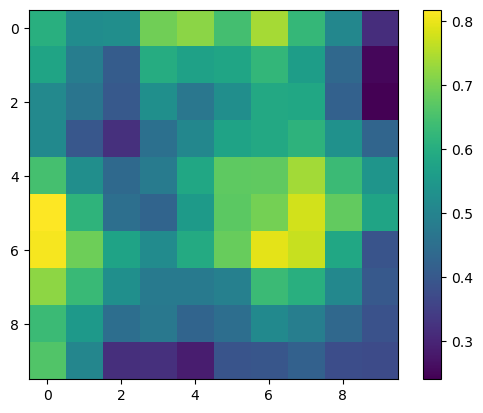

In [76]:
plt.imshow(ndimage.convolve(grid, np.ones((3, 3))/9), interpolation='none')
plt.colorbar()

In [150]:
def fixed_points_convolve(size: int, R: typing.Callable,
                          threshold=.8, kernel_width=10,
                          iterations=3):
    
    # grid = np.zeros((size, size))
    fixed = R(size, size)
    mask = fixed > threshold
    fixed = np.where(mask, fixed, 0)
    grid = fixed.copy()
    
    kernel = np.ones((kernel_width, kernel_width)) / kernel_width**2
    for i in range(iterations):
        grid = grid.reshape(-1)
        grid[mask.reshape(-1)] = fixed.reshape(-1)[mask.reshape(-1)]
        grid = grid.reshape(size, size)
        
        grid = ndimage.convolve(grid, kernel)
        
    
    return (grid+1) * 100

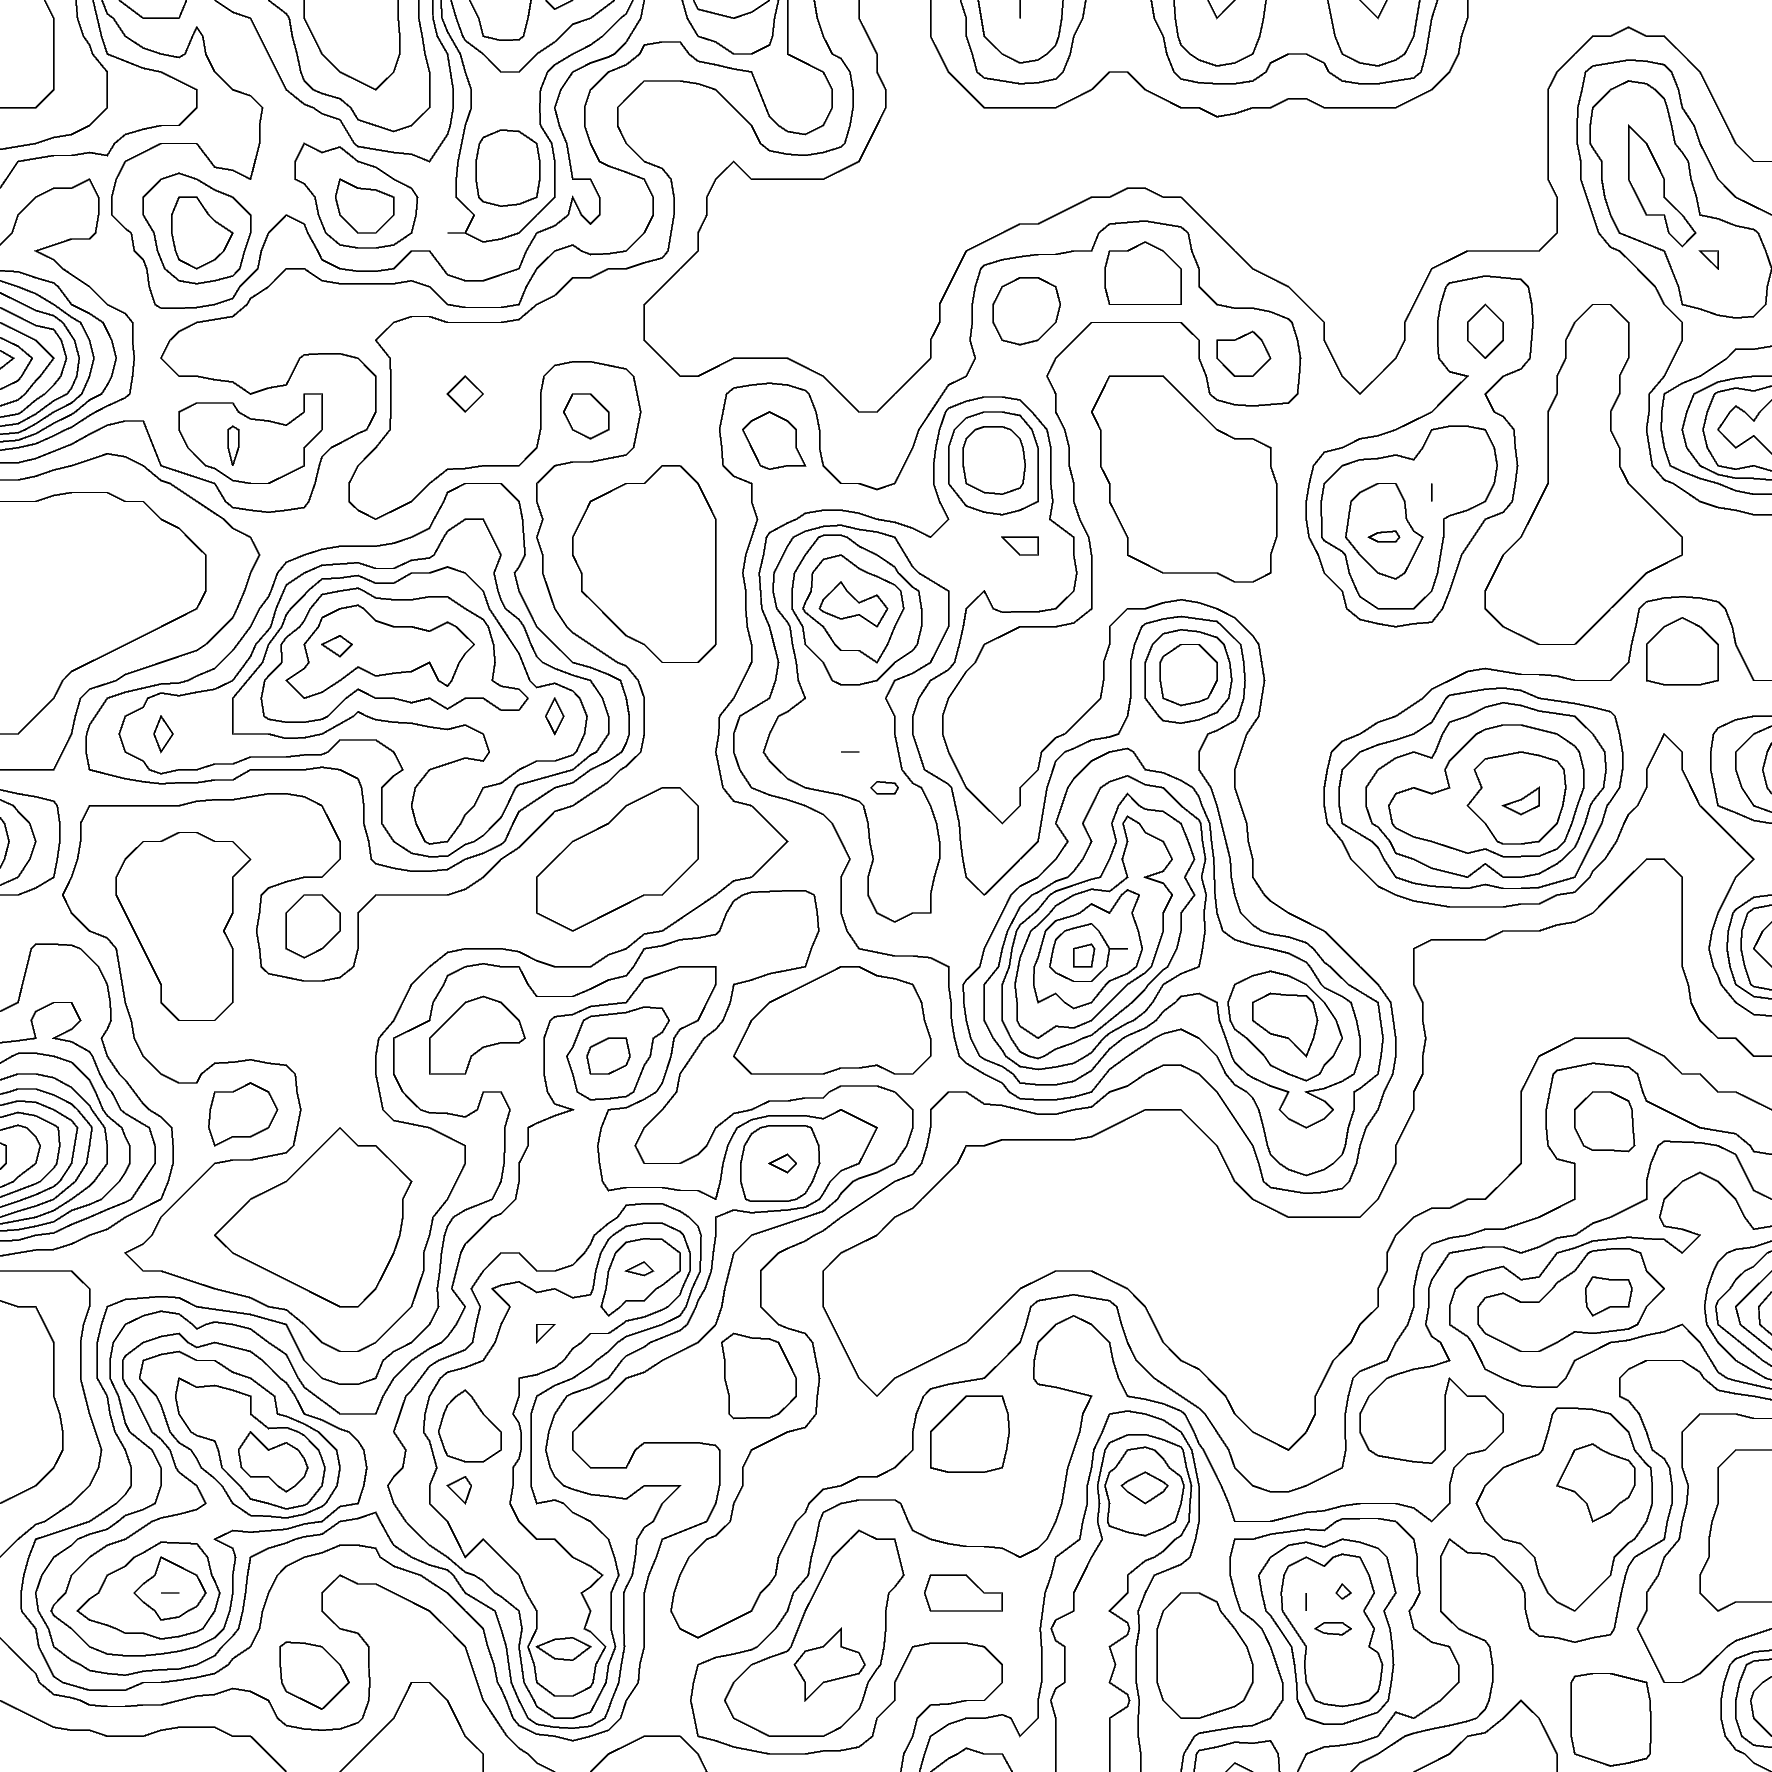

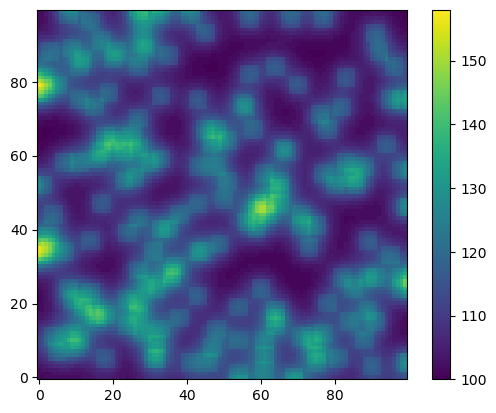

In [175]:
def contplot(grid):
    
    grid = xr.DataArray(grid).astype(int)
    # grid = np.log(grid)
    
    plt.imshow(grid, origin='lower', interpolation='none')
    plt.colorbar()
    
    fig = pygmt.Figure()
    fig.grdcontour(grid=grid, annotation='-')
    fig.show()
    
    return grid

np.random.seed(42)
grid = fixed_points_convolve(100, R, iterations=10, kernel_width=5, threshold=.98)
contplot(grid)
pass